In [8]:
library(tidyverse)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
data2019 <- read.csv("soData2019_clean.csv", stringsAsFactors=TRUE)
dim(data2019)
head(data2019, 5)
str(data2019)

[1] 88883    85

Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NA,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14,Man,No,Straight / Heterosexual,NA,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NA,...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19,Man,No,Straight / Heterosexual,NA,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,28,Man,No,Straight / Heterosexual,NA,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,Ukraine,No,"Bachelorâ€™s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,30,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


'data.frame':	88883 obs. of  85 variables:
 $ Respondent            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MainBranch            : Factor w/ 5 levels "I am a developer by profession",..: 2 2 3 1 1 3 1 4 1 1 ...
 $ Hobbyist              : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 1 2 2 2 ...
 $ OpenSourcer           : Factor w/ 4 levels "Less than once a month but more than once per year",..: 3 2 3 3 4 3 3 2 4 4 ...
 $ OpenSource            : Factor w/ 3 levels "OSS is, on average, of HIGHER quality than proprietary / closed source software",..: 3 3 3 3 1 3 3 1 3 1 ...
 $ Employment            : Factor w/ 6 levels "Employed full-time",..: 4 5 1 1 1 1 3 5 1 1 ...
 $ Country               : Factor w/ 179 levels "Afghanistan",..: 170 22 158 172 168 32 168 71 112 71 ...
 $ Student               : Factor w/ 3 levels "No","Yes, full-time",..: 1 2 1 1 1 1 1 NA 1 1 ...
 $ EdLevel               : Factor w/ 9 levels "Associate degree",..: 6 8 2 2 2 2 2 2 9 4 ...
 $ UndergradMajor        : Factor w/ 

In [5]:
data2019$CareerSat <- factor(data2019$CareerSat, levels = c("Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied", NA), ordered = TRUE)
data2019$JobSat <- factor(data2019$JobSat, levels = c("Very satisfied","Slightly satisfied","Neither satisfied nor dissatisfied","Slightly dissatisfied","Very dissatisfied","NA"), ordered = TRUE)
data2019$OrgSize <- factor(data2019$OrgSize, levels = c("10,000 or more employees","5,000 to 9,999 employee","1,000 to 4,999 employees","500 to 999 employees","100 to 499 employees","20 to 99 employees","10 to 19 employees","2-9 employees","Just me - I am a freelancer, sole proprietor, etc.","NA"), ordered = TRUE)

In [6]:
str(data2019)

'data.frame':	88883 obs. of  85 variables:
 $ Respondent            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MainBranch            : Factor w/ 5 levels "I am a developer by profession",..: 2 2 3 1 1 3 1 4 1 1 ...
 $ Hobbyist              : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 1 2 2 2 ...
 $ OpenSourcer           : Factor w/ 4 levels "Less than once a month but more than once per year",..: 3 2 3 3 4 3 3 2 4 4 ...
 $ OpenSource            : Factor w/ 3 levels "OSS is, on average, of HIGHER quality than proprietary / closed source software",..: 3 3 3 3 1 3 3 1 3 1 ...
 $ Employment            : Factor w/ 6 levels "Employed full-time",..: 4 5 1 1 1 1 3 5 1 1 ...
 $ Country               : Factor w/ 179 levels "Afghanistan",..: 170 22 158 172 168 32 168 71 112 71 ...
 $ Student               : Factor w/ 3 levels "No","Yes, full-time",..: 1 2 1 1 1 1 1 NA 1 1 ...
 $ EdLevel               : Factor w/ 9 levels "Associate degree",..: 6 8 2 2 2 2 2 2 9 4 ...
 $ UndergradMajor        : Factor w/ 

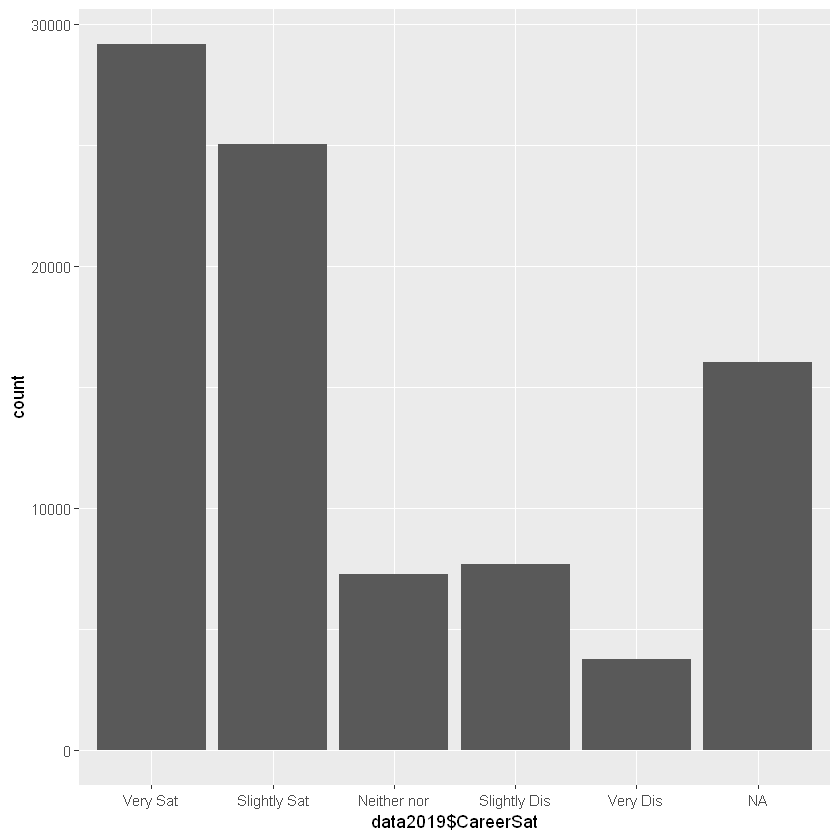

In [9]:
ggplot(data = data2019, aes(data2019$CareerSat)) + stat_count() + scale_x_discrete(labels = c("Very satisfied"="Very Sat", "Slightly satisfied" = "Slightly Sat", "Neither satisfied nor dissatisfied" = "Neither nor", "Slightly dissatisfied" = "Slightly Dis", "Very dissatisfied" = "Very Dis"))

Followup on: 
1. Is there a correlation between job sat and career sat?
2. Other vars: agefirstcode, yearscode, orgsize, mngidiot, gender, age
3. Classification k nearest neighbor + decision trees (very satisfied with yes or no and categories, and so on)
- grouping into two large categores in the end
4. Linear regression model on some parts (to see after above points). 